# 🦠 Workshop: From Theory to Simulation 
## A Practical Guide to Mechanistic Disease Modeling with EMULSION

**Lead:** Jerrold Tubay | **Date:** 10 January 2025  
**Origin:** Adapted from doctoral training by Sébastien Picault (INRAE)

---
### 🎯 Learning Objectives
* **Conceptual Mapping:** Translate biological assumptions into formal state-machine diagrams.
* **Stochastic Literacy:** Understand the role of random chance in disease dynamics.
* **Parameter Sensitivity:** Identify which biological variables impact outbreak trajectories.
* **Simulation-Based Reasoning:** Use model outputs to justify public health interventions.

In the following exercises, we will start with a simple model and see how EMULSION helps to introduce new features to make it more realistic and represent detection and control measures. 
In the meanwhile, a few side issues will be also explored to illustrate specific points in modelling.

The "evolution" of the models goes through the following diagram:

![img/progression.svg](img/progression.svg)


Solutions are proposed for each exercise in the `solutions` directory.

### Note the transition from Compartmental (Step 1) to Hybrid (Step 6) paradigms—this is the core strength of EMULSION.

---
<div style="padding: 15px; background-color: #e7f3ff; border-left: 5px solid #2196F3;">
    <h2 style="margin-top: 0;">📦 Module 1: SIR Fundamentals</h2>
    <p>We begin by translating the classic <b>Susceptible-Infectious-Recovered</b> flowchart into a computer model.</p>
</div>

---

# 🟢 Exercise 1: Your First EMULSION Model

In this exercise, we explore **`exercises/step1.yaml`**. This file describes a discrete-time, compartment-based **SIR (Susceptible-Infectious-Recovered)** model. 

---

### 1.1 Anatomy of the Model
Open the file [exercises/step1.yaml](exercises/step1.yaml) in your editor. EMULSION models are written in **YAML**, a format that relies on strict indentation to organize information. As you browse the code, locate these four core sections:

1.  **`state_machines`**: This defines the "flowchart" of the disease—the states (**S**, **I**, and **R**) and the logical paths between them.
2.  **`transitions`**: These are the rules for moving between states. Look for the `rate` keyword; this is where biological transitions are calculated.
3.  **`parameters`**: This section contains constants like `transmission_rate` and `recovery_duration`.
4.  **`initial_conditions`**: This sets initial conditions such as "Patient Zero" (how many individuals start in the **I** state).

### 1.2 Running the Simulation
Instead of using an external terminal, we will execute the model directly within this notebook using the **Code Cell** immediately following this description.

**Instruction:** The next cell uses the `%%bash` magic command. This tells Jupyter to run the code as a terminal script. It will automatically navigate to the `exercises` directory and launch EMULSION.

**To run the model:** Click on the next cell and press **Shift + Enter**.

In [ ]:
%%bash 
cd exercises
emulsion run --plot step1.yaml

### 1.3 Analyzing the Results
Once the simulation finishes, look for a link to an **HTML plot** in the cell output: [img/stoch_compart_SIR.html](exercises/img/stoch_compart_SIR.html). Open it to view the interactive epidemic curves.

**Discussion Points:**
* **The Peak:** At what time step does the number of Infectious individuals reach its maximum?
* **Persistence:** Does the number of Susceptible individuals ever reach zero? If not, why?
* **Consistency:** Since this model is stochastic, does the graph look identical every time?

Plots corresponding to simulation outcomes are produced in a file named after the `model_name` value specified in the YAML file: [img/stoch_compart_SIR.html](exercises/img/stoch_compart_SIR.html). 

When this notebook is running online with Binder, the plot file does not open automatically. You have to open the link above and click "Trust HTML" to view the results.

![html](img/html.png)

These plots are built from the simulation outputs which are stored in a CSV file named `counts.csv`, which by default is located in the `outputs/` directory: [outputs/counts.csv](exercises/outputs/counts.csv)

**NOTES:** 
- Running `emulsion -h` provides all possible commands and options. 
- Also, in the terminal, the command comes with completion (start typing and hit TAB key to view proposals).

In [ ]:
%%bash
emulsion -h

### 1.3 View model diagrams 

Produce a graphical representation of the state machines of the model:

```
emulsion diagrams step1.yaml
```

then look at the results here: [img/stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg).    


In [ ]:
%%bash
cd exercises
emulsion diagrams step1.yaml

![stoch_compart_SIR_health_state_machine.svg](solutions/img/stoch_compart_SIR_health_state_machine.svg)

* These diagrams are produced automatically from the model using Graphviz and the "dot" format. The corresponding figures are in the `img/` directory, named after the model and each state machine, for instance [stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg). By default, they are produced in SVG format; alternatively (with option `--format`), they can be produced in PDF or PNG formats.
    
 * The "dot" files are in `outputs/` and can be customized for further use: [stoch_compart_SIR_health_state.dot](exercises/outputs/stoch_compart_SIR_health_state.dot)
    

### 1.4 Change simulation conditions

Play with the model through the command-line interface: for instance, to run only one repetition (`-r 1`) but observe the evolution of the system in the long run (500 days: `-t 500`) with different parameter values (`-p` to change parameter value):

```
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1
```

**DISCUSSION**
> How would you turn this model into a SIRS (assuming a natural waning of the resistance to infection)?

In [ ]:
%%bash
cd exercises
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1

---

## Exercise 2 — Introduce demography and age structure

Open file [exercises/step2.yaml](exercises/step2.yaml) and incorporate the following changes:

### 2.1 Add age groups

We will represent two age groups: **juveniles** (J) and **adults** (A), juveniles becoming adults at rate *maturation=0.05*. We will take example on existing parameters, processes and state machines:

- rename the model from `stoch_compart_SIR` to `stoch_compart_SIR_JA`
- add a process at animals level, named `age_group`

    ```yaml
      processes:
        animals:
          - health_state
          - age_group
    ```   

- add a state machine `age_group`, with two states (J and A), and a transition between J and A 
    ```yaml
      state_machines:
         age_group:
         desc: '...'
         states:
           - J:
               name: 'Juveniles'
               desc: '...'
               fillcolor: 'purple'
           - A:
               name: 'Adults'
               desc: 'a...'
               fillcolor: 'darkred'
         transitions:
           - from: J
             to: A
             rate: 'maturation'
             desc: 'maturation of juvenile individuals into adults'
    ```

- add the parameter `maturation`
    ```yaml
      parameters:
        maturation: 
          desc: 'maturation rate, i.e. speed at which juveniles become adults'
          value: 0.05
    ```   

### 2.2 Run the model and observe the results. 
    
```
emulsion run --plot step2.yaml --silent
```

In [ ]:
%%bash
cd exercises
emulsion run --plot step2.yaml --silent

... and check the results: [img/stoch_compart_SIR_JA.html](exercises/img/stoch_compart_SIR_JA.html)

**IMPORTANT NOTE:** 

Initial individuals are **distributed randomly** in J and A states. This is because the prototypes used for defining the initial conditions do not specify the value of `age_group`.

Let's assume that juveniles should be regarded as the default `age_group` state. 
- modify the initial prototypes to assign a "default" age group:
    ```yaml
      prototypes:
        animals:
          - healthy:
              desc: 'healthy animals'
              health_state: S
              age_group: default
          - infectious:
              desc: 'infectious animals'
              health_state: I
              age_group: default
    ```

- modify state J in the state machines section to mark it as the default age group state:
    ```yaml
      state_machines:
      ...
        age_group:
          states:
               - J:
                   name: 'Juveniles'
                   desc: '...'
                   fillcolor: 'purple'
                   default: yes
          ...
    ```

### 2.3 Add a density-dependent mortality

Mortality is represented with a new state "Deceased" (D) in state machine `age_group`. It produces a "sink" to put individuals leaving the system.

Add state D **with property `autoremove: yes`** and transitions from both J and A to D with mortality rate `mu * total_herd / K`. 
- variable `total_herd` represents the total number of animals, automatically defined in EMULSION
- add two new parameters: the base mortality rate ``mu = 0.05`` and the carrying capacity of the environment ``K = 150``


### 2.4 Add a birth dynamics

State machines can define a `productions:` section (similar to `transitions:`) to specify from and to which states and at which rate new individuals are produced.

- create a new prototype `newborn` for new individuals, specifying their `age_group` (J) but also their `health_state` (S, assuming no vertical transmission)
- add a production link between A and J (adults produce juveniles) at birth rate *b = mu* $\times\ 2$, specifying `prototype: newborn` for the newly created individuals

### 2.5 Test your final model

```
emulsion run --plot step2.yaml --silent
```


In [ ]:
%%bash
cd exercises 
emulsion run --plot step2.yaml --silent

... and check the results: [img/stoch_compart_SIR_JA.html](exercises/img/stoch_compart_SIR_JA.html)

### 2.6 Check the new diagram

You can visualize the diagram corresponding to the new state machine:

```
emulsion diagrams step2.yaml
```

In [ ]:
%%bash
cd exercises
emulsion diagrams step2.yaml

![img/stoch_compart_SIR_JA_age_group_machine.svg](solutions/img/stoch_compart_SIR_JA_age_group_machine.svg)

**PLEASE NOTE:**
- the *autoremove* state (D) with dotted box
- the *production link* from A to J, with dashed arrow

**DISCUSSION:**

> How would you add disease-induced mortality? (several possibilities)

### 2.7 Parenthesis: Integrate simulation results with R or other statistical sotware

The default plots produced by EMULSION are not meant to be used but for immediate feedback during model prototyping. Otherwise, the simulation results can be processed with your favourite statistics tool such as [R](https://www.r-project.org/). In what follows, we processed the output in Python for convinience.

First, simulate your model with enough stochastic repetitions

In [ ]:
%%bash
cd exercises 
emulsion run --plot step2.yaml --silent -r 50

Then you can use a custom R script to transform and visualize new information from raw simulation data:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV
results = pd.read_csv("exercises/outputs/counts.csv")

# Number of runs
NB_RUNS = results['simu_id'].nunique()

# Prep & compute
tmp = results[['simu_id', 'step', 'I', 'percentage_prevalence']].copy()
tmp['persists'] = tmp['I'] > 0

def mean_prevalent(s):
    mask = tmp.loc[s.index, 'persists']
    return (s[mask].mean() / 100.0) if mask.sum() > 0 else np.nan

grp = tmp.groupby('step').agg(
    persistence=('persists', lambda x: x.sum() / NB_RUNS),
    prevalence=('percentage_prevalence', mean_prevalent)
).reset_index()

# Plot
plt.figure(figsize=(9,5))
plt.plot(grp['step'], grp['persistence'], label='Persistence', lw=2)
plt.plot(grp['step'], grp['prevalence'], label='Mean prevalence (persistent runs)', lw=2)
plt.xlabel("Time (days)")
plt.ylabel(f"Proportion (on {NB_RUNS} repetitions)")
plt.grid(alpha=0.3)
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

- Persistence = “Does infection survive?” (across runs)
- Prevalence = “How big is the infection among those surviving runs?”

# ⏱️ Exercise 3: Non-Exponential Durations

In most basic models, the time spent in a state (like how long an individual stays a Juvenile) follows an **exponential distribution**. This assumes a "memoryless" process where an individual has the same probability of leaving the state every day, regardless of how long they have already been there.

EMULSION allows you to specify **non-exponential durations**. This is essential for modeling specific life stages (like a fixed pregnancy period) or diseases with a strict incubation time. 

> **How it works:** When a state has a `duration` property, individuals are "locked" in that state until the timer is up, unless a transition is specifically marked to allow an early **escape**.



---

### 3.1 Constant Duration for Juveniles

We will now modify [exercises/step3.yaml](exercises/step3.yaml) to make the juvenile stage a fixed length of time ($1/maturation$) instead of a random average.

#### 🛠️ Instructions:

1.  **Rename the Model:** Open [exercises/step3.yaml](exercises/step3.yaml) and rename the model as `stoch_compart_SIR_JA_dur`.
2.  **Define the Duration in State J:** In the `age_group` state machine, add the `duration` property to state **J**. 
    ```yaml
    - J:
        name: 'Juveniles'
        duration: 'dur_juvenile'
        fillcolor: 'purple'
    ```
3.  **Update the Maturation Transition:** Change the transition from **J to A**. Since the duration is now handled by the state "timer," replace `rate: maturation` with `proba: 1`. This tells the engine to move 100% of individuals to the Adult state as soon as the duration ends.
4.  **Enable the Escape Condition:** We don't want juveniles to be "immortal" while they wait to grow up! Mark the transition from **J to D** (mortality) with `escape: yes`. 
5.  **Add the Parameter:** In the `parameters` section, define `dur_juvenile` with the value `1/maturation`.



---

### 💡 Why use `escape: yes`?
Without this property, the `duration` acts like a protective shield. Individuals would be forced to stay in state **J** for the full duration, making them accidentally immune to death until they become adults. The "escape" allows the mortality transition to override the maturation timer.

---

### 🚀 Run the Simulation
Execute the cell below to run the updated model.

In [ ]:
%%bash
cd exercises
emulsion run --plot step3.yaml --silent

#### 📊 Compare the Outcomes
Now that you've verified the logic, look at how this changes the epidemic's progression:

* **Interactive Plot:** [exercises/img/stoch_compart_SIR_JA_dur.html](exercises/img/stoch_compart_SIR_JA_dur.html)

**Discussion Point:** Does the maturation of juveniles still look like a smooth, gradual curve? Or do you see a sudden shift where groups become adults all at once? This effect is the direct result of using fixed durations.

### 🖼️ Interpreting the New Model Symbols

When you add advanced logic like **fixed durations** and **escapes**, EMULSION automatically updates the state-machine diagrams. These visual cues are the best way to verify that your YAML code matches your biological intent.

#### 1. Generate the Diagrams
Run the following code cell to update the graphical representations for `step3.yaml`:

In [ ]:
%%bash
cd exercises
emulsion diagrams step3.yaml

Look at the diagram here: [img/stoch_compart_SIR_JA_dur_age_group_machine.svg](img/stoch_compart_SIR_JA_dur_age_group_machine.svg)

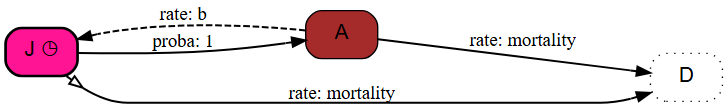

In model diagram, note:
1. the nice clock attached to states with a specific duration property
2. the triangle at the beginning of transitions endowed with an escape condition.

# 🦠 3.2 Adding Latency: Transitioning to an SEIR Model

In many diseases, individuals do not become contagious immediately after being infected. There is a "waiting period" known as the **latent** (or exposed) period. To reflect this biological reality, we will move from a simple **SIR** model to an **SEIR** model by inserting an **Exposed (E)** state.

Unlike the juvenile stage where we used a constant duration, we will model latency using a **Gamma distribution**. This creates a realistic "narrow" window where most individuals transition around day 6, rather than at a purely random (exponential) rate.


---

### 🛠️ Implementation Checklist

Open [exercises/step3.yaml](exercises/step3.yaml) and apply the following modifications:

1.  **Rename the Model:** Change the `model_name` to `stoch_compart_SEIR_JA_dur`.
2.  **Add State E:** In the `health_state` machine, insert state **E** between **S** and **I**. Give it a `duration` property.
    ```yaml
    states:
      - E:
          name: 'Exposed'
          desc: 'Infected but not yet infectious'
          duration: 'dur_latency'
          fillcolor: 'orange'
    ```
3.  **Adjust Transitions:** * Change the **S → I** transition to **S → E** (this is still driven by the transmission rate).
    * Create a new transition from **E → I** with `proba: 1` (this triggers automatically when the duration in **E** expires).
4.  **Define Parameters:** * Add `avg_dur_latency = 6`.
    * Define `dur_latency` using: `random_gamma(50, avg_dur_latency/50)`. 
    > **Note:** We use a shape parameter of $k=50$ to ensure the distribution is very narrow around the mean.
5.  **Update Initial Conditions:**
    * Create a prototype named `infected` (or modify `infectious`) so that initial cases start in state **E**.
6.  **Update Monitoring:**
    * Modify the `percentage_prevalence` formula to include the latent individuals:
      `percentage_prevalence`.

---

### 🚀 Run the Simulation

Execute the cell below to run the model. In the resulting plot, look for the characteristic **horizontal shift** (time delay) between the orange curve (Exposed) and the red curve (Infectious).

In [ ]:
%%bash
cd exercises
emulsion run --plot step3.yaml --silent

## 🖼️ Interpreting the SEIR Results and Diagrams

After running the simulation, it is important to verify that the mathematical logic in your YAML file translates correctly into the model's behavior and structure.

### 📊 1. Analyze the Epidemic Curves
View the interactive results here:  
👉 **[Simulation Results: stoch_compart_SEIR_JA_dur.html](exercises/img/stoch_compart_SEIR_JA_dur.html)**

---

### 🔍 2. Visual Audit of the Model Logic
Generate the state machine diagrams to see how EMULSION represents these new properties visually:

```bash
emulsion diagrams step3.yaml

In [ ]:
%%bash
cd exercises
emulsion diagrams step3.yaml

![img/stoch_compart_SEIR_JA_dur_health_state_machine.svg](solutions/img/stoch_compart_SEIR_JA_dur_health_state_machine.svg)

---
<div style="padding: 15px; background-color: #fff4e5; border-left: 5px solid #ff9800;">
    <h2 style="margin-top: 0;">📦 Module 2: Biological Complexity</h2>
    <p>Real populations aren't static. We will now add <b>births, deaths, and age-dependent contact risks</b>.</p>
</div>

---

# 👥 Exercise 4: Adding a Contact Structure

In many biological systems, different age groups are physically separated or behave differently, which fundamentally changes how a pathogen spreads. We will now move away from the "homogeneously mixing" assumption and introduce a **contact structure**.

### 🌡️ Understanding the Force of Infection ($f$)

To model this, we define different transmission rates within and between groups. Let $trans_{AJ}$ represent the transmission rate from **Adults** to **Juveniles**. The risk of infection (force of infection) for each group is calculated as:

$$f_J = \frac{trans_{JJ} \cdot I_J + trans_{AJ} \cdot I_A}{N}$$

$$f_A = \frac{trans_{AA} \cdot I_A + trans_{JA} \cdot I_J}{N}$$

* $I_J, I_A$: Number of infectious individuals in each group.
* $N$: Total population size (`total_herd`).

---

### 4.1 Leveraging Implicit Groupings

In EMULSION compartmental models, any state machine listed in the `processes` section automatically splits the population into sub-groups. You can access these counts using the syntax `total_[State]_[Group]`. 

For example, `total_I_J` is the number of individuals who are both **Infectious (I)** and **Juveniles (J)**.

**Your Tasks:**
1.  Open [exercises/step4.yaml](exercises/step4.yaml) and rename the model to `stoch_compart_SEIR_JA_dur_struct`.
2.  In the `outputs` section, create two new expressions to track prevalence separately:
    * `prevalence_juveniles`
    * `prevalence_adults`

---

### 4.2 Splitting the Force of Infection

We will now use **Boolean variables** (`is_J`, `is_A`) as "switches" to apply the correct infection logic depending on which group an individual belongs to.

#### 🛠️ Step-by-Step implementation:

1.  **Revise the `force_of_infection` parameters:**
    Update your YAML to use the following structure, which switches the logic based on the age group:

    ```yaml
    force_of_infection:
      desc: 'infection function using age-group switches'
      value: 'is_J * force_of_infection_juveniles + is_A * force_of_infection_adults'
    
    force_of_infection_juveniles:
      desc: 'force of infection experienced by juveniles'
      value: '(transJJ * total_I_J + transAJ * total_I_A) / total_herd'
    
    force_of_infection_adults:
      desc: 'force of infection experienced by adults'
      value: '(transAA * total_I_A + transJA * total_I_J) / total_herd'
    ```

2.  **Define Transmission Parameters:**
    Add `transJJ`, `transAA`, `transAJ`, and `transJA` to your `parameters` section.



---

### 🚀 4.3 Testing and Comparison

Run the model twice to see how the contact structure changes the epidemic's shape. Use the `-p` flag to override parameters directly from the command line.

**Scenario A: No Contact Structure (Homogeneous)**
All transmission rates are equal ($0.5$).
```bash
emulsion run --plot step4.yaml -p transJJ=0.5 -p transAA=0.5 -p transAJ=0.5 -p transJA=0.5 --silent

In [ ]:
%%bash
cd exercises
emulsion run --plot step4.yaml -p transJJ=0.1 -p transAA=1 -p transAJ=0.05 -p transJA=0.05 --silent

# 🧬 Exercise 5 — Transitioning to an Individual-Based Model (IBM)

Compartmental models are efficient for large populations because they treat individuals as aggregate quantities. However, they lack "identity." **Individual-Based Models (IBM)** offer a finer-grained approach where every individual is simulated explicitly with its own unique features and history.

EMULSION makes this transition remarkably simple by allowing you to reuse your existing state machines in an agent-based context.



---

### 🛠️ Step-by-Step Conversion

To transform your model, open [exercises/step5.yaml](exercises/step5.yaml) and apply these three changes:

1.  **Rename the Model**: Change the `model_name` to `stoch_IBM_SEIR_JA_dur`.
2.  **Change Aggregation Type**: In the `levels:` section, find the `herd` level and change the aggregation type from `compartment` to `IBM`.
3.  **Define Explicit Groupings**: In IBMs, you must declare which combinations of states the engine should track to calculate counts. Add the following `grouping:` section:
    ```yaml
    grouping:
      herd:
        infection_by_age: [health_state, age_group]
    ```



---

### 💡 Understanding IBM Variables

Once you define an explicit grouping, EMULSION automatically generates variables to bridge the gap between individual agents and population statistics:

* **Global Counts**: Variables in the form `total_X_Y` (e.g., `total_I_J` is the number of **Infectious Juveniles** in the herd).
* **Individual Booleans**: Boolean variables in the form `is_X` (e.g., `is_I` returns **1** if the individual agent is infectious, and **0** otherwise). These are essential for defining logic that depends on an individual's status.

---

### 🚀 Run and Observe

Because the underlying biological logic (transitions and durations) remains the same, the model is ready to run as an IBM immediately.

In [ ]:
%%bash
cd exercises
emulsion run --plot step5.yaml --silent

> Note the execution time — slow, isn’t it ?...

## Exercise 6 — Hybrid Models

The primary drawback of Individual-Based Models (IBM) is often the computational cost and execution time. **Hybrid models** provide a solution by automatically grouping individuals with identical states to optimize performance while retaining the fine-grained features of an IBM.



To transition to a hybrid architecture, follow these steps in [exercises/step6.yaml](exercises/step6.yaml):

* **Rename the model**: Change the `model_name` to `stoch_hybrid_SEIR_JA_dur`.
* **Update Aggregation**: In the `levels:` section, change the `aggregation_type` to `'hybrid'`.
* **Link Processes**: Update the `processes:` section to link your state machines to the `infection_by_age` grouping defined in the previous exercise.

### 🛠️ Update the Processes Section

```yaml
processes:
  animals:            
    - health_state: infection_by_age
    - age_group: infection_by_age
```
* **Grouping**: Do not forget to include the grouping as well:
```yaml
grouping:
  herd:
    infection_by_age: [health_state, age_group]
```

In [ ]:
%%bash
cd exercises
emulsion run --plot step6.yaml --silent

and check the results: [img/stoch_hybrid_SEIR_JA_dur_struct.html](exercises/img/stoch_hybrid_SEIR_JA_dur_struct.html)

> Note the execution time — much better, isn’t it ?

# Exercise 7 — Variable Individual Shedding

In this exercise, we introduce biological heterogeneity. Instead of a constant transmission rate, pathogen shedding will now vary between individuals (accounting for different immune responses) and decay over time as the host clears the infection.

### 7.1. Adding Individual and Aggregate Variables

Open [exercises/step7.yaml](exercises/step7.yaml) and rename the model to `stoch_hybrid_SEIR_JA_dur_var`.

1.  **Declare State Variables**: We need to track the maximum and current shedding for each individual. Place it after the `parameters` section and before the `prototypes` section.
    ```yaml
    statevars:
      beta_i_max:
        desc: 'maximum shedding rate'
      beta_i:
        desc: 'current shedding rate'
    ```

2.  **Define Prototypes**: Ensure all animals initialize these variables to 0 by default. Add `default_animal` together with the betas below in the `prototype` named `animals`.
    ```yaml
    prototypes:
      animals:
        - default_animal:
            beta_i: 0
            beta_i_max: 0
    ```

3.  **Setup Herd-level Aggregation**: We need to sum the individual shedding rates to calculate the total environmental pathogen load. Add `aggregate_vars` below under the `herd` `levels`:
    ```yaml
    levels:
      herd:
        aggregate_vars:
          - name: 'total_beta'
            collect: 'beta_i'
            operator: 'sum'
    ```

4.  **Revise the Force of Infection**: The infection pressure is now driven by the total pathogen shed in the environment at the herd scale. Replace the `force_of_infection` by the one below.
    ```yaml
    parameters:
      force_of_infection:
        desc: 'infection function assuming environmental shedding'
        value: 'total_beta / total_herd'
    ```
5. **Add Default Prototype**: This ensures that the default prototype of the animal is used at the animal level. Add `default_prototype: default_animal` in the `levels` under `animals` as shown below.

   ```yaml
   levels:
     animals:
       desc: 'level of individuals'
       default_prototype: default_animal
   ```

#### ***Recommended:*** Try to run the emulsion bash code in the next cell first before going to Exercise 7.2 to verify if your yaml is free of error.
---

### 7.2. Implementing Dynamic Shedding Actions

We use **built-in actions** within the `health_state` machine to update the variables at specific events (entering or staying in a state).

* **Logic**:
    * **On Enter**: Sample $\beta_i^{max}$ from a Gamma distribution (e.g., `random_gamma(50, 1.0/50)` for low shedders vs `random_gamma(100, 2.0/100)` for high shedders).
    * **On Stay**: Decay $\beta_i$ using the formula: $\beta_i = \beta_i^{max} \times e^{-2 T_i \times recovery}$, where $T_i$ is the `duration_in_health_state`.

#### Do not forget to add the additional parameters below related to shedding:
```yaml
parameters:
  max_shedding_low:
    desc: 'average of the maximum rate in low shedders'
    value: 1.0
  max_shedding_high:
    desc: 'average of the maximum rate in high shedders'
    value: 2.0
  beta_max:
    desc: 'distribution of the maximum shedding rate of individuals, depending on age group'
    value: 'is_J * random_gamma(50, max_shedding_low/50) + is_A * random_gamma(100, max_shedding_high/100)'
  beta:
    desc: 'actual shedding rate of individuals, depending on the time elapsed since infection'
    value: 'is_I * beta_i_max * exp(-2 * recovery * duration_in_health_state)'
```

Update the **Infectious (I)** state in your state machine:

```yaml
- I:
    name: 'Infectious'
    desc: 'infected and able to transmit the disease'
    fillcolor: 'firebrick'
    on_enter:
      - set_var: 'beta_i_max'
        value: 'beta_max'    # Use a conditional based on age group
      - set_var: 'beta_i'
        value: 'beta_i_max'
    on_stay:
      - set_var: 'beta_i'
        value: 'beta'        # Time-dependent decay formula
    on_exit:
      - set_var: 'beta_i'
        value: 0

In [ ]:
%%bash
cd exercises
emulsion run --plot step7.yaml --silent

Examine the outcome [img/stoch_hybrid_SEIR_JA_dur_var.html](img/stoch_hybrid_SEIR_JA_dur_var.html). 
> What do the different shedding behaviors tell you?

# 🛡️ Part 4 — Control Strategies & Metapopulations

In this final section, we move from biological realism to **interventions**. We will implement detection and isolation protocols at the local level and then scale the entire system into a **Metapopulation** to observe regional disease spread.

## Exercise 8 — Test-and-Cull Policy

In this exercise, we transition from observing the epidemic to managing it through a **Test-and-Cull** protocol. We assume the disease can be detected via a diagnostic test with specific performance metrics.

### 🧪 Understanding the Test Logic

The probability of an individual testing positive depends on their actual health status and the test's accuracy:
* **Sensitivity ($Se$):** Ability to correctly identify infected individuals ($p(Positive | Infected)$).
* **Specificity ($Sp$):** Ability to correctly identify healthy individuals ($p(Negative | Healthy)$).

The probability of a positive result for an individual is calculated as:
$$p_{positive} = (is\_I \times Se) + ((1 - is\_I) \times (1 - Sp))$$



---

### 🛠️ Implementation in `step8.yaml`

Open [exercises/step8.yaml](exercises/step8.yaml) and rename the model to `stoch_hybrid_SEIR_JA_dur_var_test`.

#### 1. Add the `test_status` State Machine
Define the protocol with the following states and transitions:
* **`Untested`**: The default state. Testing begins only when the number of untested individuals exceeds a `threshold_untested` (50).
* **`Negative`**: Animals that tested negative. This result is valid for 12 weeks (84 days), after which they return to `Untested`.
* **`Suspicious`**: Animals that tested positive once. They wait for a `delay_before_confirmation` (7 days) for a second test.
* **`Confirmed`**: Animals that tested positive twice in a row. They are scheduled for removal.
* **`Culled`**: Animals permanently removed from the herd after a `delay_before_culling` (5 days).

**Try to add the `test_status` state machine on your own at first, then check the [solutions/step8.yaml](solutions/step8.yaml) to verify if the state machine you added is correct. See the new parameters below and use them in you new state machine.**

#### 2. Define Parameters and Expressions
Add the following to your `parameters:` section:
```yaml
parameters:
  dur_negative:
    desc: 'validity duration of a negative test (days)'
    value: '7*12'
  delay_before_culling:
    desc: 'delay before culling a confirmed animal (days)'
    value: 5
  delay_before_confirmation:
    desc: 'delay before a suspicious animal is tested again (days)'
    value: 7
  threshold_untested:
    desc: 'minimum number of untested animals to perform tests'
    value: 50
  sensitivity:
    desc: 'sensitivity of the test'
    value: 0.9
  specificity:
    desc: 'specificity of the test'
    value: 0.7
  proba_positive_test:
    desc: 'probability that an individuals is tested positive'
    value: 'is_I * sensitivity + (1 - is_I) * (1 - specificity)'
  proba_negative_test:
    desc: 'probability that an individuals is tested negative'
    value: '1 - proba_positive_test'
  time_to_test:
    desc: 'condition for performing tests'
    value: 'float(total_Untested >= threshold_untested)'
```

#### 3. Update Groupings and Processes
In an IBM or Hybrid model, you must explicitly tell EMULSION to track the new state machine. 

* **Grouping**: Add `test_status` to your existing groupings to ensure the engine counts individuals in different test phases.
```yaml
grouping:
  herd:
    infection_by_age: [health_state, age_group]
    infection_and_test: [test_status, health_state]
```
* **Processes**: Add the `test_status` state machine to the `animals` level.
```yaml
processes:
  animals:
    - health_state: infection_by_age
    - age_group: infection_by_age
    - test_status: infection_and_test
```

#### 4. Update the Default Prototype
Ensure that the `default_animal` prototype initializes the `test_status` to `Untested`. Add `test_status: Untested` as seen below.
```yaml
prototypes:
  animals:
    - default_animal:
        beta_i: 0
        beta_i_max: 0
        test_status: Untested
```

---

### 🚀 Run and Analyze

Generate the state machine diagrams to verify the logic, then run the simulation:

```bash
emulsion diagrams step8.yaml
emulsion run --plot step8.yaml --silent

In [ ]:
%%bash
cd exercises
emulsion diagrams step8.yaml
emulsion run --plot step8.yaml --silent

![img/stoch_hybrid_SEIR_JA_dur_var_test_test_status_machine.svg](solutions/img/stoch_hybrid_SEIR_JA_dur_var_test_test_status_machine.svg)

### 8.3 Improve tests 

As you can see, this test-and-cull protocol is not very efficient...
Check output plot here: [img/stoch_hybrid_SEIR_JA_dur_var_test.html](img/stoch_hybrid_SEIR_JA_dur_var_test.html).

Try to improve protocol efficacy:
- what would happen with more sensitive/specific tests ?
- what is the impact of the delays to re-test or cull confirmed animals ?
- how would you represent tests that can detect early infection (i.e. exposed state as well as infectious?)

## Exercise 9 — Quarantine

In the previous model, suspicious and confirmed animals could still infect others.  
Quarantine provides a way to isolate detected animals so they are not a threat during a given period.

---

### 1. Update the Model Name
Open [`exercises/step9.yaml`](exercises/step9.yaml) and change the model name to: `stoch_hybrid_SEIR_JA_dur_var_test_quar`

---

### 2. Add a New State Machine
Create a new state machine called **`isolation`** with the following states:

- **`InGroup`** (default): animals remain with the rest of the herd  
- **`Isolated`**: suspicious or confirmed animals move here for a duration `dur_quarantine = 40` days, then return to `InGroup`
```yaml
state_machines:
  isolation:
    desc: 'The state machine which handles quarantine'
    states:
      - InGroup:
          name: 'InGroup'
          desc: 'used for animals which are with all other animals of the herd'
          default: yes
      - Isolated:
          name: 'Isolated'
          desc: 'used for animals set in quarantine due to detection'
          duration: 'dur_quarantine'
          fillcolor: 'cyan'
    transitions:
      - from: InGroup
        to: Isolated
        proba: 'OR(is_Suspicious, is_Confirmed)'
      - from: Isolated
        to: InGroup
        proba: 1
```

---

### 3. Update the Default Prototype
Adjust the prototype to include the new `isolation` state machine.
```yaml
prototypes:
  animals:
    - default_animal:
        beta_i: 0
        beta_i_max: 0
        test_status: Untested
        isolation: InGroup
```

---

### 4. Rewrite Grouping and Processes
Update the grouping and processes as follows:

```yaml
grouping:
  herd:
    infection_by_age: [health_state, age_group]
    infection_and_test: [test_status, health_state, isolation]

processes:
  animals:
    - health_state: infection_and_test
    - age_group: infection_by_age
    - test_status: infection_and_test
    - isolation: infection_and_test
```
### 5. Update the force of infection 

- Variables of the form `total_I` are generated from state names.
- Aggregate variables such as `total_beta` also apply, giving forms like: `total_beta_X`, where `X` is a valid state name.
- Rule: Exclude `Isolated` individuals from the force of infection, since they do not contribute to transmission.

In [ ]:
%%bash
cd exercises
emulsion diagrams step9.yaml
emulsion run --plot step9.yaml --silent

![img/stoch_hybrid_SEIR_JA_dur_var_test_quar_isolation_machine.svg](solutions/img/stoch_hybrid_SEIR_JA_dur_var_test_quar_isolation_machine.svg)

### 6. Discussion

Have a look at the state machine diagrams and run your model with the best control strategy found in the test-and-cull measure. 

Can culling be replaced with quarantine?

## Exercise 10 — Changing Scale: Metapopulation

EMULSION models can operate at the **metapopulation** scale. A metapopulation is a collection of populations (herds) connected by a contact structure, allowing us to account for factors like indirect transmission, regional pathogen pressure, or individual mobility.

### 🛠️ 10.1. Add the Metapopulation Level

Open **[exercises/step10.yaml](exercises/step10.yaml)** and change the model name to `stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop`.

---

#### 1. Define the Levels Hierarchy
In the `levels:` section, add a new top-level named `metapop`. This level acts as a container for our herds.

```yaml
levels:
  metapop:
    desc: 'level of the metapopulation'
    aggregation_type: 'metapopulation'
    contains:
      - herd
```
### 2. Move Initial Prevalence to State Variables
Since different herds can have different starting conditions, `initial_prevalence` can no longer be a fixed global parameter.

Action: Move `initial_prevalence` from the `parameters:` section to the `statevars:` section.

Action: Remove the `value:` field and keep only the `desc:` part.

### 3. Create Herd-Level Prototypes
Define the state of populations at the start of the simulation in the `prototypes:` section under the `herd` level:

```yaml
prototypes:
  herd:
    - healthy_herd:
        initial_prevalence: 0
    - infected_herd:
        initial_prevalence: 0.1
```
### 4. Define the Territory Size
Add a new parameter to define the total number of herds in your simulation:

`nb_herds`: Set this to a small value (e.g., 4 to 10) for your initial tests.

### 5. Configure Initial Conditions
Tell EMULSION how to populate the territory. We want one herd to start the outbreak while the others remain healthy.

```yaml
initial_conditions:
  metapop:
    - prototype: infected_herd
      amount: 1
    - prototype: healthy_herd
      amount: 'nb_herds - 1'
```
🚀 Run and Verify
"Et voilà!" Your model is now a metapopulation. Generate the diagrams to verify the structure and run the simulation:

In [ ]:
%%bash
cd exercises
emulsion run --plot step10.yaml --silent

Look at the [results](exercises/img/stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop.html):

![img/metapop.png](img/metapop.png)


### 10.2 Transmission between populations

At this stage, indeed, the pathogen spreads within the infected population as expected but not to other populations. To do so, we now assume that the force of infection experienced by each population is composed of:
- the previous force of infection (within-population transmission)
- a force of infection resulting from pathogen spread by other populations

1. In the ``levels:`` section, add an aggregate variable ``metapop_total_beta`` to compute the total amount of pathogen in the metapopulation.
```yaml
levels:
  metapop:
    desc: 'level of the metapopulation'
    aggregation_type: 'metapopulation'
    contains:
      - herd
    aggregate_vars:
      - name: 'metapop_total_beta'
        collect: 'total_beta'
        operator: 'sum'
```
2. Define a parameter ``trans_metapop = 0.002`` which represents the proportion of total amount of pathogen shed in the metapopulation which contributes to transmission in each herd, and add a term in the `force_of_infection` to account for this between-herd transmission
```yaml
parameters:
  force_of_infection:
    desc: 'infection function assuming frequency dependence'
    value: 'is_InGroup * (total_beta_InGroup + total_beta_from_metapop) / total_herd'
  trans_metapop:
    desc: 'transmission due to the proportion of pathogen coming from other herds of the metapopulation'
    value: 0.002
  total_beta_from_metapop:
    desc: 'force of infection due to the contribution of other herds of the metapopulation'
    value: 'trans_metapop * (metapop_total_beta - total_beta)'
```
3. Test your model and see the disease spread within the metapopultion as the prevalence in the initial infected herd grows...


### 10.3 Processes at population scale

In an EMULSION model, state machines can be used to implement processes not only at the individual scale, but also at the level of the population.

1. Write a state machine ``herd_status`` which corresponds to the following diagram:

![img/stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop_herd_status_machine.svg](solutions/img/stoch_hybrid_SEIR_JA_dur_var_test_quar_metapop_herd_status_machine.svg)

2. Add the corresponding expressions (``any_case``,  ``any_confirmed``) and durations (``dur_alert``, e.g. 5 days, and ``dur_infected``, e.g. 15 days) in the ``parameters:`` section.
```yaml
parameters:
  dur_alert:
    desc: 'duration of the Alert state before re-assessing the herd status (days)'
    value: 5
  dur_infected:
    desc: 'duration of the Infected state before re-assessing the herd status (days)'
    value: 15
  any_case:
    desc: 'boolean, 1 if any suspicious or confirmed case, 0 otherwise'
    value: 'float(total_Suspicious + total_Confirmed > 0)'
  any_confirmed:
    desc: 'boolean, 1 if any confirmed case, 0 otherwise'
    value: 'float(total_Confirmed > 0)'
```

2. Modify the ``processes:`` section as follows:
```yaml
       processes:
         herd:
           - herd_status
         animals:
           ... (unchanged)
```
           
4. Do not forget that the initial ``herd_status`` of each herd must be initialized! You can either update herd prototypes, or define a default prototype associated with level herd.
```yaml
prototypes:
  herd:
    - default_herd:
        desc: 'prototype used to initialize herd variables'
        herd_status: DiseaseFree
```

5. You can track the evolution of the status of each herd by adding variables ``is_Alert`` or ``is_Infected`` to the outputs.
           

### 10.4 Conditional simulation interruption

Suppose that your objective is to study how long it takes for the metapopulation to be fully infected (and detected as such): in that case, maybe running each simulation for the whole period is a waste of time.

The ``time_info`` section provides a way to interrupt the simulation before the time limit (100 time steps by default, overriden by ``total_duration`` or command-line option ``-t``). 

1. Create an aggregate variable ``metapop_nb_infected`` at metapop scale to compute the number of herds in the ``Infected`` state.
```yaml
levels:
  metapop:
    desc: 'level of the metapopulation'
    aggregation_type: 'metapopulation'
    contains:
      - herd
    aggregate_vars:
      - name: 'metapop_total_beta'
        collect: 'total_beta'
        operator: 'sum'
      - name: 'metapop_nb_infected'
        collect: 'is_Infected'
        operator: 'sum'
```

2. Write an expression ``all_populations_infected`` in the ``parameters:`` section to determine whether or not all populations are in this status.
```yaml
parameters:
  all_populations_infected:
    desc: 'boolean, 1 if all populations of the metapopulation have the herd status Infected, 0 otherwise'
    value: 'Eq(metapop_nb_infected, nb_herds)'
```

3. In the ``time_info:`` section, just add:
```yaml
       time_info:
         ...
         stop_condition: 'all_populations_infected'
```